# Лабораторная работа 3 - Регрессия

**Цель работы:** Изучение методов регрессионного анализа данных

**Задачи:**
1. Подгововить данные
2. Создать нейронную сеть
3. Проверить работу сети

## Задание на лабораторную работу

1. Загрузить и провести предварительную обработку данные из заданного вашим вариантом датасета (если в данных есть пропуски, то их надо убрать)
2. Выберите иследуемый признак (числовой признак)
2. Создайте и обучите нейронную сеть до уровня ошибки на тестовой выборке 0.02 (для нормализованых данных), а так же выведите следующие показатели:
    1. Точность обучения (по эпохам)
        1. Ошибка на тренировочной выборке
        2. Ошибка на тестовой выборке


## Требования к оформлению работы

1. Работа должна быть выполнена в формате Jupyter-notebook (*.ipynb)
2. Работа должна быть разделена на главы: титульная надпись, цель работы, ход работы и вывод
2. Все надпись в работе (текст, кроме коментариев кода) должен быть оформлен на языке Markdown
3. Вывод ячеек с кодом (ceils) должен сопроводжаться описанием и описание должно быть оформлено в отдельной ячейки в формате Markdown. Данное правило относится только к выводу который представляет интерес с точки зрения хода работы, вывод для служебных ячеек или переходных действий описывать не надо

## 1. Подгововить данные

### Загрузка

In [ ]:

# подключение библиотек
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
from tqdm.notebook import tqdm

tqdm.pandas()

%matplotlib inline

C:\Anaconda3\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


Загружаем данные о стоимости жилья в Бостоне

*переменная `target` это стоимость жилья*

In [ ]:
from sklearn.datasets import load_boston

boston_data = load_boston()
data_future = boston_data.data
data_target = boston_data.target

data = pd.concat([
  pd.DataFrame(data_future, columns=boston_data.feature_names),
  pd.DataFrame(data_target, columns=['target'])
], axis=1)

data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Нормализация

Нормализация данных это приведение данных в некий стандартный вид

Для алгоритмов машинного обучения это - числовой вид и желательно что бы все числа лежали в диапазоне от -1 до 1 или от 0 до 1 

In [ ]:
# Исходные данные
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa



Как можно видеть ниже мы преобразовали колонку Species в 3 колонки к которых записан либо 0 либо 1
3 колонки потому что в колонки 3 класса (3 разных надписи)
0 или 1 - это какой клас был изначально

In [ ]:
# Первым делом представим строковые данные как числовые
import sklearn.preprocessing as preprocessing

number_data = pd.get_dummies(data)
number_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Простая номализация.
Данных маштабируются на промежуток от 0 до 1, где 0 - минимум в данных, а 1 - это максимум.
Все остальные находятся между ними
*Обратите внимание на размер оси y на графике*

<AxesSubplot:>

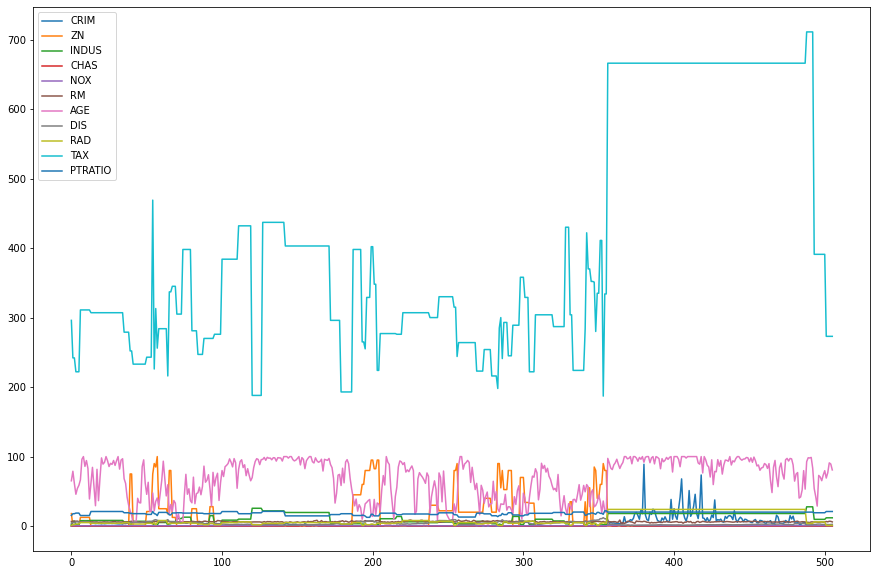

In [ ]:
number_data[number_data.columns[:-3]].plot(figsize=(15, 10))

In [ ]:
plt.figure(figsize=(15, 10))

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [ ]:
mm_scalar = preprocessing.MinMaxScaler()
mm_scalar.fit(number_data)
mm_norm_number_data = pd.DataFrame(columns=number_data.columns, data=mm_scalar.transform(number_data))
mm_norm_number_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333


<AxesSubplot:>

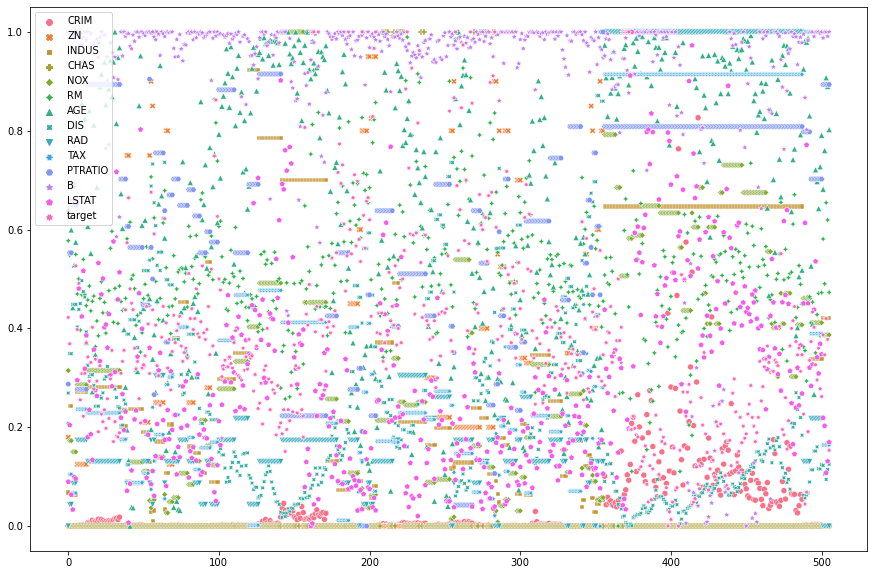

In [ ]:

# Данный нормализатор выравнивает данные относительно минимального и максимального
# mm_norm_number_data.plot(figsize=(10, 10), )
plt.figure(figsize=(15, 10))
sns.scatterplot(data=mm_norm_number_data)

Следующий нормализатор похож на предыдущий, только он маштабирует данные относительно максимального по модулю

<AxesSubplot:>

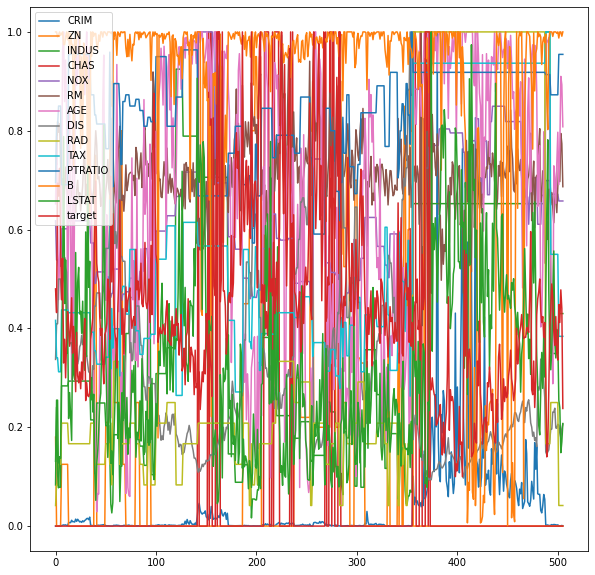

In [ ]:
# Данный нормализатор выравнивает данные относительно максимально
ma_scaler = preprocessing.MaxAbsScaler()
ma_scaler.fit(number_data)
ma_norm_data = pd.DataFrame(columns=number_data.columns, data=ma_scaler.transform(number_data))
ma_norm_data.plot(figsize=(10, 10))


Это более продвинутая нормализация, она использует статистику для определения центра в данных (мат. ожинания) и висперсии данных и в соответствие с этим маштабирует данные

In [ ]:
# Нормализация на основе дисперсии и мат. ожидания
std_scaler = preprocessing.StandardScaler()
std_scaler.fit(number_data)
std_norm_data = pd.DataFrame(columns=number_data.columns, data=std_scaler.transform(number_data))

Обратите внимание
Данные хоть и маштабированы, но они не лежат в диапазоне от -1 до 1, а привышают его. Тут можно испоьзовать дополнительно MinMaxScaler

<AxesSubplot:>

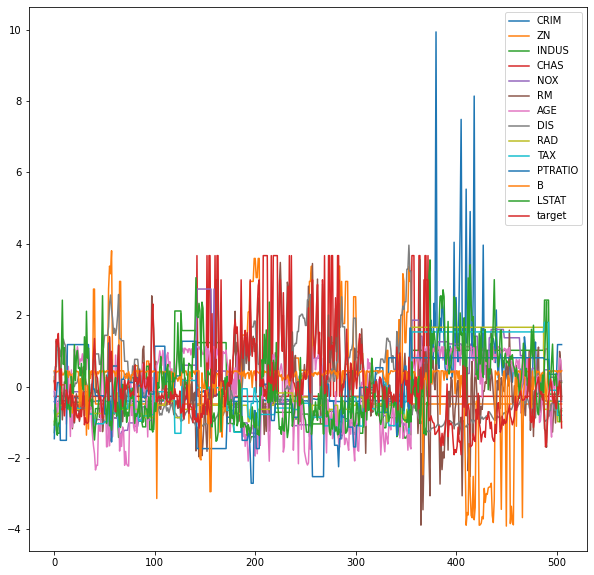

In [ ]:
std_norm_data.plot(figsize=(10, 10))

Данный нормализатор похож на предидущий, только он в добавок ко всему убирает выбросы (промахи) в данных

In [ ]:
# Нормализация на основе дисперсии и мат. ожидания c удалением выбросов
std_clear_scaler = preprocessing.RobustScaler()
std_clear_scaler.fit(number_data)
std_clear_norm_data = pd.DataFrame(columns=number_data.columns, data=std_clear_scaler.transform(number_data))


Тут все те же проблемы, что и у StandartScaler

<AxesSubplot:>

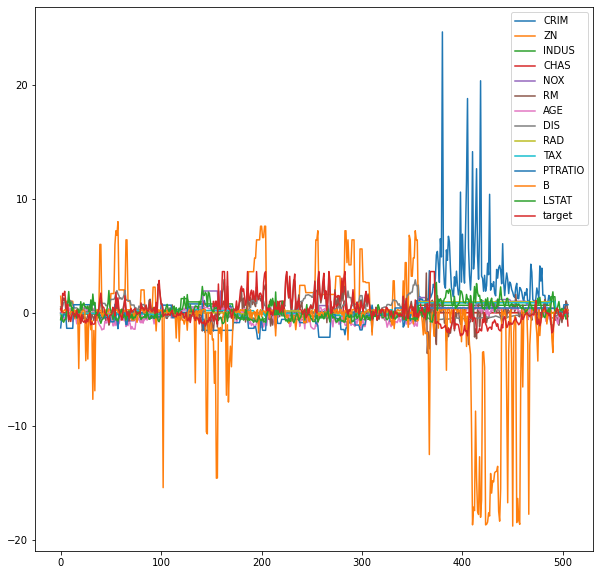

In [ ]:
std_clear_norm_data.plot(figsize=(10, 10))

# Нейронные сети (Keras)


**Обратите внимание** Не обязательно повторять пошагово все модификации и улучшения нейронной сети. Вы можите сразу же сделать 1 хорошую сеть. Показанная пошаговая разработка ниже нужна как демонстрация просесса разработки

## Построение простой нейронной сети (регрессия)

Для удобства работы с нейронной сеть, переопределим переменные

- number_data_ready_X теперь X_train
- number_data_ready_Y теперь Y_train


В перепенной X_train хранятся данные для тренировки сети (входные)


В перепенной Y_train хранятся данные для тренировки сети (выходные или правильные ответы)

Для обучения воспульзуемся нормализоваными данными по алгоритму **MaxAbsScaler**  
Так же разделим наши данные на тестовые и тренировочные

In [ ]:
from sklearn.model_selection import train_test_split

X = ma_norm_data.drop('target', axis=1).values
Y = ma_norm_data['target'].values

# X = ma_norm_data[:-1]
# Y = ma_norm_data[-1]


X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8)

#### Подключаем библиотеку keras


```Python
from keras.layers import Dense
```
Строка отвечает за подключение сущности Dense которая реализует простой полносвязные слой сети (FFN)

```Python
from keras.models import Sequential
```
Строка отвечает за подключение сущности Sequential которая реализует саму нейронную сеть

```Python
from keras import activations
```
Это импорт (activations) содержи в себе список функций активании для сети

```Python
from keras.optimizers import Adam, RMSprop
```
Тут мы подключаем алгоритмы тренировки Адам и алгоритм обратного распостранения ошибки(RMSprop)

```Python
from keras.losses import categorical_crossentropy
```
Подключаем фукцию подсчета ошибки сети (кросэтропися для данных представленных в виде категорий)

```Python
from keras.metrics import categorical_accuracy
```
Подключаем фукцию подсчета метрики сети (точность попадания в категорию)


In [ ]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras import activations
from keras.optimizers import Adam, RMSprop
from keras.losses import categorical_crossentropy
from keras.metrics import categorical_accuracy

#### Создаем сеть
```Python
model = Sequential()
```
Создаем сущность сети

```Python
model.add(Dense(10, activation=activations.relu, input_dim=X_train.shape[1]))
```
Добавляем слой сети из 10 нейронов с функцией активации Relu и количеством входом равным количеству столбцов во входном массиве

```Python
model.add(Dense(Y_train.shape[1], activation=activations.softmax)) # output = 3
```
Добавляем последний слой(выходной) количество нейронов равно количеству столбцов в выходном массиве и функцией активации Softmax 

```Python
model.compile(Adam(), categorical_crossentropy, metrics=[categorical_accuracy])
```
Компилируем (собираем) сеть с параметрами:
- алгоритм обучения: *Adam*
- Функция обибки: *categorical_crossentropy*
- дополнительные метрики:
    - categorical_accuracy


In [ ]:
X.shape

(506, 13)

In [ ]:
model = Sequential()
model.add(Dense(10, activation=activations.relu, input_dim=X.shape[1])) # input_dim = 4
model.add(Dense(1, activation='sigmoid')) # output = 3

model.compile(Adam(), 'mae')

### Обучение


Запускаем обучение сети с параметрами:
- 1 параметр: матрица с входным массивом
- 2 параметр: матрица с требуемыми ответами (выходная матрица)
- verbose=2 : устанавливаем уровень вывода отладочной информации на 2 уровень
- epochs=100 : задаем количество эпох для обучения (100 для начала более чем достаточно)
- batch_size=3 : размер группы для обучения (пакетный метод), гду говоря как часто пересчитывать веса сети (влияет на скорость и что более важно на качество обучения (параметр подбирается опытным путем) )

In [ ]:
model.fit(X_train, y_train, verbose=1, epochs=100, batch_size=3)

Epoch 1/100
135/135 [==============================] - 0s 630us/step - loss: 0.0563
Epoch 2/100
135/135 [==============================] - 0s 563us/step - loss: 0.0559
Epoch 3/100
135/135 [==============================] - 0s 600us/step - loss: 0.0565
Epoch 4/100
135/135 [==============================] - 0s 585us/step - loss: 0.0555
Epoch 5/100
135/135 [==============================] - 0s 682us/step - loss: 0.0563
Epoch 6/100
135/135 [==============================] - 0s 600us/step - loss: 0.0559
Epoch 7/100
135/135 [==============================] - 0s 571us/step - loss: 0.0558
Epoch 8/100
135/135 [==============================] - 0s 541us/step - loss: 0.0555
Epoch 9/100
135/135 [==============================] - 0s 556us/step - loss: 0.0555
Epoch 10/100
135/135 [==============================] - 0s 548us/step - loss: 0.0557
Epoch 11/100
135/135 [==============================] - 0s 570us/step - loss: 0.0551
Epoch 12/100
135/135 [==============================] - 0s 608us/step - lo

Посчитаем точность сети (1 цифра показывает ошибку сети, 2 метрику (точность) )

In [ ]:
# для тестовых данных
model.evaluate(X_train, y_train)

13/13 [==============================] - 0s 1ms/step - loss: 0.0499


0.04993946850299835

In [ ]:
# для тренировочных
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 0.0608


0.060777220875024796

### Построение усложненого варианта НС с делением данных на обучающую и тестовую выборку с визуализацие процесса обучения

In [ ]:
# Подключим новые библиотеки
# библиотека дополнительных возможностей (действий) при обучении сети
from keras import callbacks

#### Именим способ создания сети

В работе библиотеки *keras* есть одна особенность  
**Запуская метод *fit* 2 и более раз вы будете обучать всегда одну и туже сеть**

Поэтому мы обернем создание сети в метод для того что бы при каждом вызове метода fit создавалась новая сеть

In [ ]:
def make_nn(input_len, output_len):
    model = Sequential()
    model.add(Dense(10, activation=activations.relu, input_dim=input_len))
    model.add(Dense(output_len, activation=activations.sigmoid))
    model.compile(Adam(), 'mae')
    return model

В обучение модели добавим проверку на тестовых данных, так же добавим наш первый callback - *History*: он просто сохраняет историю измерения ошибки и метрик по эпохам

In [ ]:
model = make_nn(X_train.shape[1], 1)

print('Начинаем обучение сети')
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=5,
    epochs=300,
    verbose=0,
    validation_data=(X_test, y_test),
    callbacks=[
        callbacks.History(),
    ]
    
)

Начинаем обучение сети


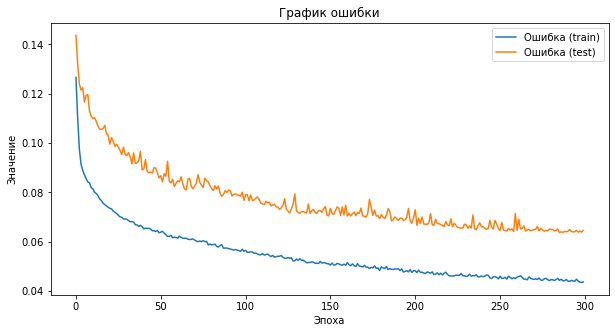

In [ ]:
plt.figure(0, figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('График ошибки')
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.legend(['Ошибка (train)', 'Ошибка (test)']);

На самом деле в *keras* все готово для разделения данных на тренировочные и тестовые

In [ ]:
model = make_nn(X.shape[1], 1)

print('Начинаем обучение сети')
history = model.fit(
    x=X,
    y=Y,
    batch_size=3,
    epochs=100,
    verbose=1,
#     Вот это разделения данных в соотношении 80/20
    validation_split=0.2,
    callbacks=[
        callbacks.History(),
    ]
    
)

Начинаем обучение сети
Epoch 1/100
40/40 [==============================] - 0s 4ms/step - loss: 1.1331 - acc: 0.4083 - val_loss: 1.2419 - val_acc: 0.0000e+00
Epoch 2/100
40/40 [==============================] - 0s 950us/step - loss: 1.1040 - acc: 0.4167 - val_loss: 1.2880 - val_acc: 0.0000e+00
Epoch 3/100
40/40 [==============================] - 0s 1ms/step - loss: 1.0771 - acc: 0.4167 - val_loss: 1.3313 - val_acc: 0.0000e+00
Epoch 4/100
40/40 [==============================] - 0s 900us/step - loss: 1.0448 - acc: 0.4167 - val_loss: 1.3748 - val_acc: 0.0000e+00
Epoch 5/100
40/40 [==============================] - 0s 975us/step - loss: 1.0106 - acc: 0.4250 - val_loss: 1.3877 - val_acc: 0.0000e+00
Epoch 6/100
40/40 [==============================] - 0s 825us/step - loss: 0.9656 - acc: 0.5417 - val_loss: 1.3944 - val_acc: 0.0000e+00
Epoch 7/100
40/40 [==============================] - 0s 975us/step - loss: 0.9073 - acc: 0.8250 - val_loss: 1.4127 - val_acc: 0.0000e+00
Epoch 8/100
40/40 [===

In [ ]:
plt.figure(0, figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('График ошибки')
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.legend(['Ошибка (train)', 'Ошибка (test)']);

NameError: name 'plt' is not defined

### Улучшение сети - Ранняя остановка
Как можно видеть на графиках выше - в какой, то момент сеть перестает улучшать свой результат и тут в лучшем случае ее надо останавливать, проблма в том, что вы не знаете заранее когда надо останавливаться (сколько нужно циклов обучения (эпох) ) 

In [ ]:
model = make_nn(X.shape[1], 1)

print('Начинаем обучение сети')
history = model.fit(
    x=X,
    y=Y,
    batch_size=3,
#     Так как у нас теперь есть рання остановка мы можем увеличеть количество эпох (было 100 стало 300)
    epochs=300,
    verbose=1,
#     Вот это разделения данных в соотношении 80/20
    validation_split=0.2,
    callbacks=[
        callbacks.History(),
        callbacks.EarlyStopping(
#             На основе какого значения будет приниматься решеня об остановке
            monitor='val_acc',
#             Указываем направления лучшего значения (min, max, auto) лучшим является если тестовая точноть будет максимальной
            mode='max',
#             Количество эпок в резельтате которых если значение не изменилось, то произвести остановку
            patience=50,
#             "Чуствительность" метода - изменения ниже данного значения дубут считатья 0 (изменения в отслеживаемом значении нету)
            min_delta=0.01,
        )
    ]
    
)

Начинаем обучение сети
Epoch 1/300
40/40 [==============================] - 0s 4ms/step - loss: 1.1007 - acc: 0.1667 - val_loss: 0.7218 - val_acc: 1.0000
Epoch 2/300
40/40 [==============================] - 0s 1ms/step - loss: 1.0256 - acc: 0.2833 - val_loss: 0.8706 - val_acc: 0.2000
Epoch 3/300
40/40 [==============================] - 0s 1ms/step - loss: 0.9531 - acc: 0.4333 - val_loss: 0.9788 - val_acc: 0.0000e+00
Epoch 4/300
40/40 [==============================] - 0s 850us/step - loss: 0.8995 - acc: 0.5750 - val_loss: 1.0837 - val_acc: 0.0000e+00
Epoch 5/300
40/40 [==============================] - 0s 900us/step - loss: 0.8499 - acc: 0.8167 - val_loss: 1.0728 - val_acc: 0.0000e+00
Epoch 6/300
40/40 [==============================] - 0s 925us/step - loss: 0.8021 - acc: 0.8333 - val_loss: 1.0973 - val_acc: 0.0000e+00
Epoch 7/300
40/40 [==============================] - 0s 900us/step - loss: 0.7475 - acc: 0.8333 - val_loss: 1.0764 - val_acc: 0.0000e+00
Epoch 8/300
40/40 [=============

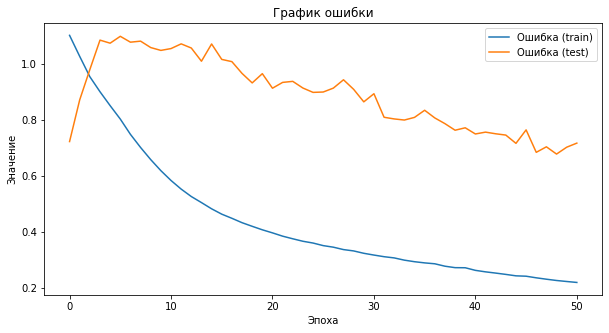

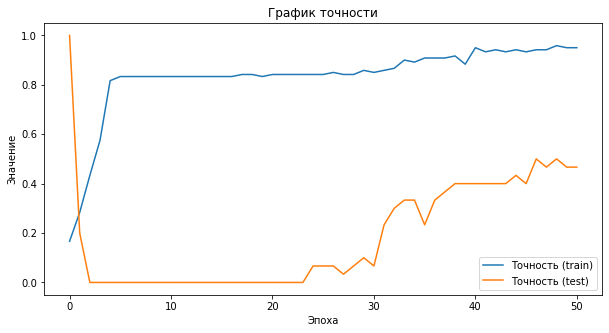

In [ ]:
plt.figure(0, figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('График ошибки')
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.legend(['Ошибка (train)', 'Ошибка (test)']);

### Контрольные точки
В обучении НС самый последний результат обучения не всегда самый лучший результат, это вызвано несколькими причинами, например переобучением сети или скатыванию к среднему значению.  
Для того что бы поймать тот самый лучший результат обучения, были придуманы "контрольные точки" *ModelCheckpoint*


Для использования контрольных точек необходимо подготовить директорию, где будут хранится контрольные точки

In [ ]:
from pathlib import Path
from os import remove

In [ ]:
# создадим функцию создания о очисти каталога контрольных точек
# указываем шаблон имени фала контрольной точки
file_name = 'nn_model_loss-{loss:.6f}_val_loss-{val_loss:.6f}.hdf5'
def make_save_points(name='save_points', file_name=file_name):
#     выбираем катагол (подробнее https://docs.python.org/3.6/library/pathlib.html ) 
    checkpoints_dir = Path('./').joinpath('save_points')
    print(f'Текущий каталог с контрольными точками {checkpoints_dir.absolute()}')
    # Создаем каталог если его нету
    checkpoints_dir.mkdir(exist_ok=True)
    # Удаляем все из каталога
    for item in checkpoints_dir.iterdir():
        if item.is_file():
            print(f'Удаляем файл {item}')
            remove(item)
    return str(checkpoints_dir.joinpath(file_name))

    

In [ ]:
from keras import callbacks
from keras.layers import Dropout

In [ ]:
print('Начинаем обучение сети')

def make_nn(input_len, output_len):
    model = Sequential()
    model.add(Dense(26, activation=activations.relu, input_dim=input_len))
    model.add(Dropout(0.5))
    model.add(Dense(13, activation=activations.relu))
    model.add(Dropout(0.25))
    model.add(Dense(output_len, activation=activations.sigmoid))
    model.compile(Adam(), 'mse', metrics=['mae'])
    return model

history = make_nn(X.shape[1], 1).fit(
    x=X,
    y=Y,
    batch_size=15,
    epochs=600,
    validation_split=0.2,
    verbose=0,
    callbacks=[
        callbacks.History(),
        # Добавляем сценарий ранней остановки
        # Если в течении 30 эпох точность не вырастить более чем на 1%, то произойдет остановка
#         callbacks.EarlyStopping(
#             monitor='val_loss',
#             mode='min',
#             patience=50,
#             min_delta=0.0001
#         ),
#         Callback сохранений состояний сети
        callbacks.ModelCheckpoint(
#             Указываем путь для сохранения и формат имен файлов
            make_save_points(file_name=file_name),
#             Указываем какое значение отслеживать
            monitor='val_loss',
#             Указываем, что сохранять надо только лучшие результаты
            save_best_only=True,
#             Говорим как часто проверять, что текущий результат лучше предидущего (в эпохах)
            period=5,
#             Указываем сторону лучших значений
            mode='min'
        )
    ]
)

Начинаем обучение сети
Текущий каталог с контрольными точками C:\Users\Admin\Documents\jupyter\save_points
Удаляем файл save_points\nn_model_loss-0.011899_val_loss-0.005805.hdf5
Удаляем файл save_points\nn_model_loss-0.015647_val_loss-0.006076.hdf5
Удаляем файл save_points\nn_model_loss-0.017811_val_loss-0.006328.hdf5
Удаляем файл save_points\nn_model_loss-0.021521_val_loss-0.006649.hdf5
Удаляем файл save_points\nn_model_loss-0.023892_val_loss-0.006893.hdf5
Удаляем файл save_points\nn_model_loss-0.026783_val_loss-0.008388.hdf5
Удаляем файл save_points\nn_model_loss-0.030648_val_loss-0.013618.hdf5


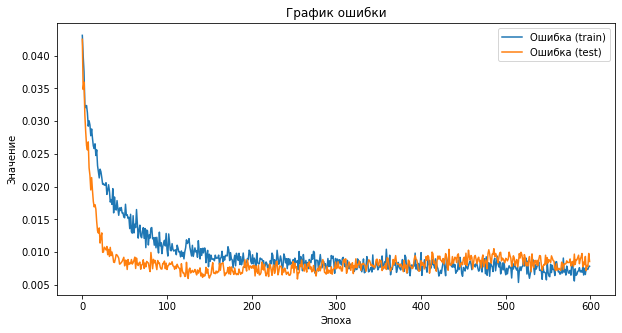

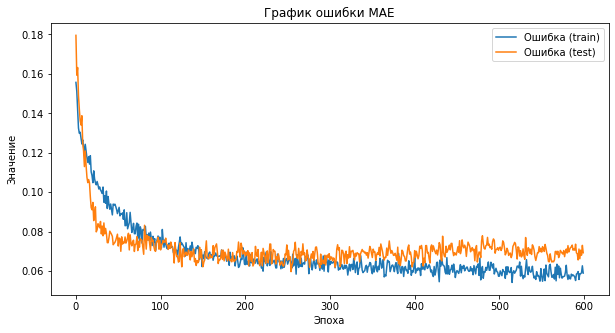

In [ ]:
plt.figure(0, figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('График ошибки')
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.legend(['Ошибка (train)', 'Ошибка (test)']);

plt.figure(1, figsize=(10,5))
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('График ошибки MAE')
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.legend(['Ошибка (train)', 'Ошибка (test)']);

Воспользуемся контрольными точками

In [ ]:
from keras.models import load_model

# Загружаем контрольную точку (модель)
# Обратите внимание путь до контрольной точки может отличатся
loaded_model = load_model('./save_points/nn_model_loss-0.008682_val_loss-0.005863.hdf5')

# Прдсказываем класс
print(f'Точность предсказания на тренировочных данных {loaded_model.evaluate(X_train, y_train)}')
print(f'Точность предсказания на тестовых данных {loaded_model.evaluate(X_test, y_test)}')

13/13 [==============================] - 0s 615us/step - loss: 0.0046 - mean_absolute_error: 0.0509
Точность предсказания на тренировочных данных [0.00460427813231945, 0.05090697482228279]
4/4 [==============================] - 0s 1ms/step - loss: 0.0090 - mean_absolute_error: 0.0577
Точность предсказания на тестовых данных [0.008983164094388485, 0.05769359692931175]


## Визуализация регресии  

Построим график показывающий взамное расположение истынных и предсказынных значений  
- синии точки - это истинные
- красные - предсказынные

*Для отображение 13 измерений в 1 (ось X) был использован алгоритм PCA*

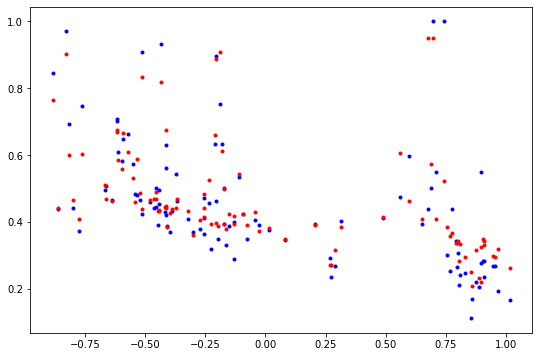

In [ ]:
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse

pca = PCA(n_components=1).fit(X_test)
fig, ax = plt.subplots(figsize=(9, 6))

pca_x = pca.transform(X_test)

ax.plot(pca_x, y_test, 'bo', markersize=3)
ax.plot(pca_x, loaded_model.predict(X_test), 'ro', markersize=3)

Построим доверительные интервалы для каждой точки (95-квантиль)  
*В качестве интевала берется 1-0.95*  
**Обратите внимание**, что говорится: мы строим область для каждой точки такую что ее границы удалены от цетра(истинного значений) не более чем на 1 - 95-квантиль, т.е. мы указываем границу ошибки в 5%

In [ ]:
import scipy
from scipy.stats import t

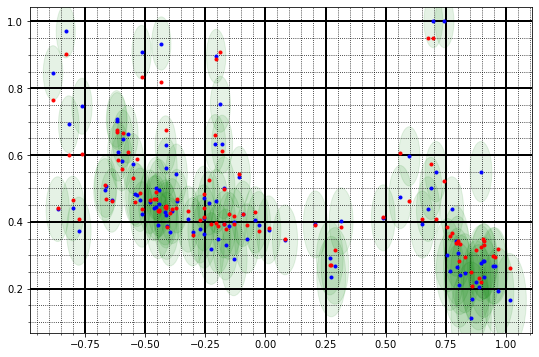

In [ ]:
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse

pca = PCA(n_components=1).fit(X_test)
fig, ax = plt.subplots(figsize=(9, 6))
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 2)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

interval = t.interval(1 - 0.95, y_test)
pca_x = pca.transform(X_test)

for i, y in enumerate(y_test):
    e = Ellipse([pca_x[i], y_test[i]], interval[0][i], interval[0][i]*2, color='green')
    ax.add_artist(e)
    e.set_alpha(0.1)

ax.plot(pca_x, y_test, 'bo', markersize=3)
ax.plot(pca_x, loaded_model.predict(X_test), 'ro', markersize=3)
# ax.grid()

Найдем процент всех попаданий предсказанного значение в доверительный интервал для истынных значений

*Это похоже на то как мы считали точность во 2 лабораторной работе*
*В данном случае попадание считается успешным если предсказанное значение отличается от истинного не более чем на 5%*

In [ ]:
y = loaded_model.predict(X_test)[:, 0]

buf = ((y_test+interval[0] < y) & (y < y_test+interval[1])).astype(int)
buf.sum() / buf.size

0.8627450980392157

## Предсказание зачения функции синуса по 2-м последним зачениям

In [ ]:
sin_x = pd.Series(np.sin(np.arange(0, 50, 0.1)))

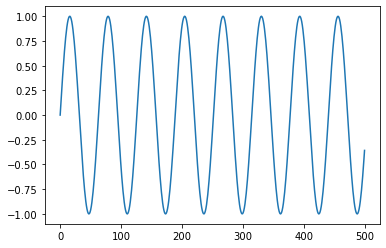

In [ ]:
plt.plot(sin_x)

Создадим датасет от функции синуса методом скользящего окна

In [ ]:
X = []
for i in range(len(sin_x) - 3):
    buf = []
    for j in range(3):
        buf.append(sin_x[i + j])
    X.append(buf)
X = np.array(X)
X.shape

(497, 3)

In [ ]:
X[:5]

array([[0.        , 0.09983342, 0.19866933],
       [0.09983342, 0.19866933, 0.29552021],
       [0.19866933, 0.29552021, 0.38941834],
       [0.29552021, 0.38941834, 0.47942554],
       [0.38941834, 0.47942554, 0.56464247]])

In [ ]:
print('Начинаем обучение сети')

def make_nn(input_len, output_len):
    model = Sequential()
    model.add(Dense(10, activation=activations.tanh, use_bias=True, input_dim=input_len))
    model.add(Dense(output_len, activation=activations.tanh, use_bias=True))
    model.compile(Adam(), 'mae')
    return model

history = make_nn(2, 1).fit(
    x=X[:, :-1],
    y=X[:, -1],
    batch_size=1,
    epochs=300,
    validation_split=0.2,
    verbose=0,
    callbacks=[
        callbacks.History(),
        # Добавляем сценарий ранней остановки
        # Если в течении 30 эпох точность не вырастить более чем на 1%, то произойдет остановка
        callbacks.EarlyStopping(
            monitor='val_loss',
            mode='min',
            patience=50,
            min_delta=0.01
        ),
#         Callback сохранений состояний сети
        callbacks.ModelCheckpoint(
#             Указываем путь для сохранения и формат имен файлов
            make_save_points(file_name=file_name),
#             Указываем какое значение отслеживать
            monitor='val_loss',
#             Указываем, что сохранять надо только лучшие результаты
            save_best_only=True,
#             Говорим как часто проверять, что текущий результат лучше предидущего (в эпохах)
            period=5,
#             Указываем сторону лучших значений
            mode='min'
        )
    ]
)

Начинаем обучение сети
Текущий каталог с контрольными точками C:\Users\Admin\Documents\jupyter\save_points
Удаляем файл save_points\nn_model_loss-0.325184_val_loss-0.410463.hdf5
Удаляем файл save_points\nn_model_loss-0.325479_val_loss-0.409738.hdf5
Удаляем файл save_points\nn_model_loss-0.325533_val_loss-0.410039.hdf5
Удаляем файл save_points\nn_model_loss-0.325687_val_loss-0.409842.hdf5
Удаляем файл save_points\nn_model_loss-0.325853_val_loss-0.410510.hdf5
Удаляем файл save_points\nn_model_loss-0.326812_val_loss-0.410863.hdf5
Удаляем файл save_points\nn_model_loss-0.329383_val_loss-0.414912.hdf5
Удаляем файл save_points\nn_model_loss-0.333137_val_loss-0.417578.hdf5
Удаляем файл save_points\nn_model_loss-0.337334_val_loss-0.421293.hdf5
Удаляем файл save_points\nn_model_loss-0.341807_val_loss-0.424490.hdf5
Удаляем файл save_points\nn_model_loss-0.345824_val_loss-0.426617.hdf5
Удаляем файл save_points\nn_model_loss-0.350118_val_loss-0.437461.hdf5
Удаляем файл save_points\nn_model_loss-0.

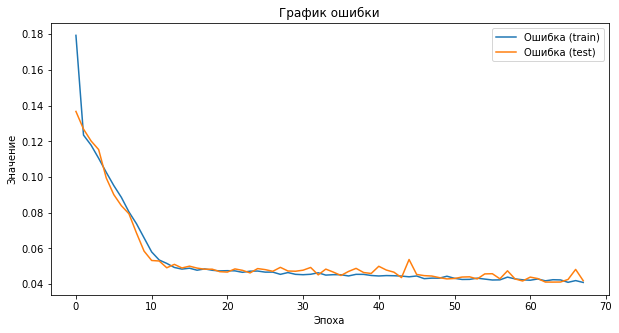

In [ ]:
plt.figure(0, figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('График ошибки')
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.legend(['Ошибка (train)', 'Ошибка (test)']);

In [ ]:
from keras.models import load_model

# Загружаем контрольную точку (модель)
# Обратите внимание путь до контрольной точки может отличатся
loaded_model = load_model('./save_points/nn_model_loss-0.042355_val_loss-0.041167.hdf5')


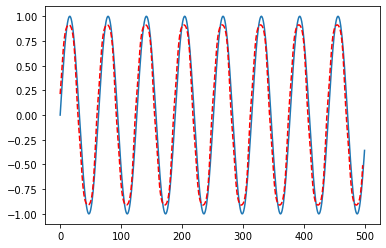

In [ ]:

plt.plot(sin_x)
y = loaded_model.predict(X[:, :-1])
plt.plot(y, 'r--')